<a href="https://colab.research.google.com/github/Kidhurshan/Lab01_STASTICAL-PATTEN-CLASSIFICATION/blob/main/LAB01_2021E025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\
# EC9630 Machine Learning - Laboratory 1
---

Task: Stastical patten classification - decision tree and information gain

Name: Kidhurshan D

Reg No:   2021/E/025

Date:     31th January 2025

Time:     1.30PM

Refernce material

 https://www.kaggle.com/learn/data-cleaning

 https://www.kaggle.com/learn/data-visualization

https://www.kaggle.com/code/alexisbcook/cross-validation
 https://www.kaggle.com/code/ryanholbrook/creating-features

 https://scikitlearn.org/stable/auto_examples/tree/plot_unveil_tree_structure.htmlsphx-glr-auto-examplestree-plot-unveil-tree-structure-py


# **Library Imports**


---



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


#**Analyzing the information**

---



This data set contains 3 files.
1. diabetes _ 012 _ health _ indicators _ BRFSS2015.csv
2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv
3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv

Three CSV files from CDC's BRFSS2015 survey.
*   samples - 253,680
*   Target variable - Diabetes_012

*   samples - 70,692
*   Target variable - Diabetes_binary

*   samples - 253,680
*   Target variable - Diabetes_binary respectively.


*   Variable Types:
Likely a mix of numerical, categorical, and textual.

*   Features:
21 feature variables in each dataset.

*   Labels:
Target variables are Diabetes_012 and Diabetes_binary.

*   Diabetes_012:
Three classes (0, 1, and 2) indicating different diabetes statuses.

*   Diabetes_binary:
Two classes (0 and 1) representing absence or presence of prediabetes/diabetes.

*   Class Imbalance:
 Present in the first and third datasets, not in the second.

*   Distribution of feature values:
 Not determined without specific dataset access.



In [5]:
# data paths
diabetes_binary_health_data_path = '/content/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_data_path = '/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
diabetes_012_health_data_path = '/content/diabetes_012_health_indicators_BRFSS2015.csv'

In [6]:
# read the data
diabetes_bin_data = pd.read_csv(diabetes_binary_health_data_path)
diabetes_5050_data = pd.read_csv(diabetes_binary_5050split_health_data_path)
diabetes_012_data = pd.read_csv(diabetes_012_health_data_path)

In [7]:
# Display basic info about each dataset
print("Diabetes Binary Health Data:")
print(diabetes_bin_data.info())

print("\nDiabetes Binary 50/50 Split Health Data:")
print(diabetes_5050_data.info())

print("\nDiabetes 0/1/2 Health Data:")
print(diabetes_012_data.info())

Diabetes Binary Health Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               2

In [8]:
# Display summary statistics for numerical columns
print("Diabetes Binary Health Data:")
diabetes_bin_data.describe()



Diabetes Binary Health Data:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
print("\nDiabetes Binary 50/50 Split Health Data:")
diabetes_5050_data.describe()




Diabetes Binary 50/50 Split Health Data:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
print("\nDiabetes 0/1/2 Health Data:")
diabetes_012_data.describe()


Diabetes 0/1/2 Health Data:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000




```
# Find Missing Values


```



In [11]:
# Finding missing values in each dataset
print("Missing values in Diabetes Binary Health Data:")
print(diabetes_bin_data.isnull().sum())

print("\nMissing values in Diabetes Binary 50/50 Split Health Data:")
print(diabetes_5050_data.isnull().sum())

print("\nMissing values in Diabetes 0/1/2 Health Data:")
print(diabetes_012_data.isnull().sum())


Missing values in Diabetes Binary Health Data:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values in Diabetes Binary 50/50 Split Health Data:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump     

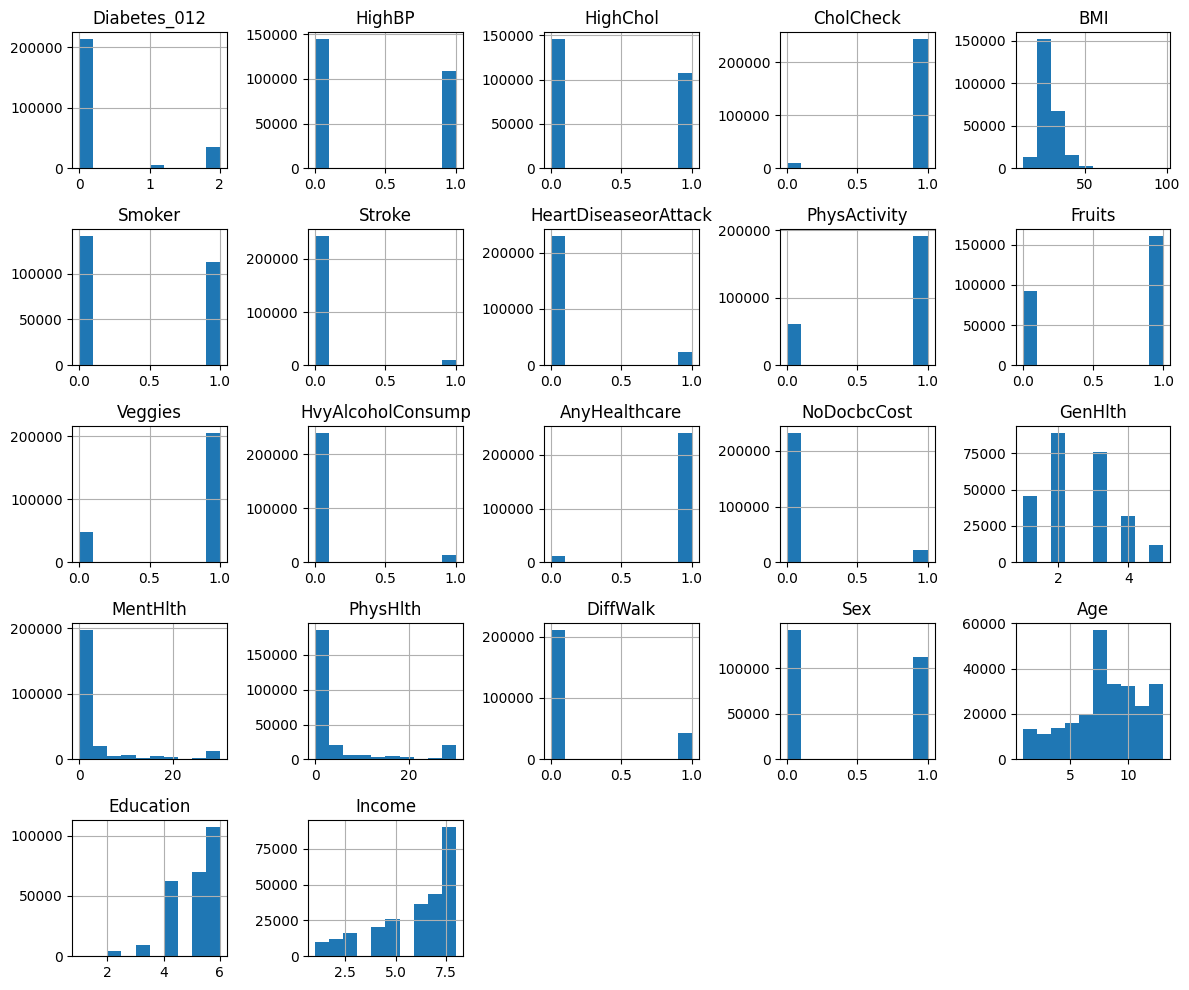

In [12]:
# Plot histograms for all numerical columns
diabetes_bin_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

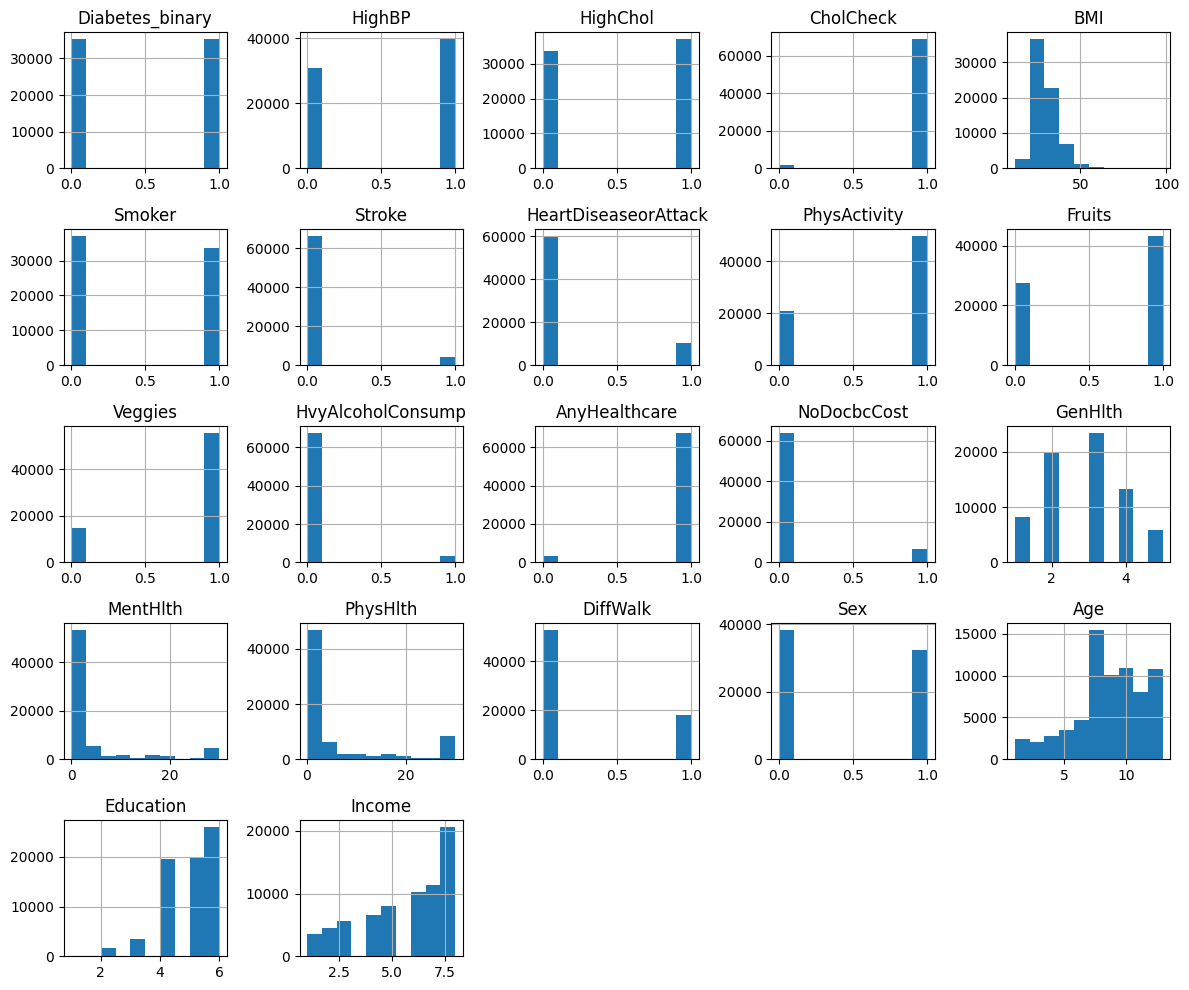

In [13]:
diabetes_5050_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

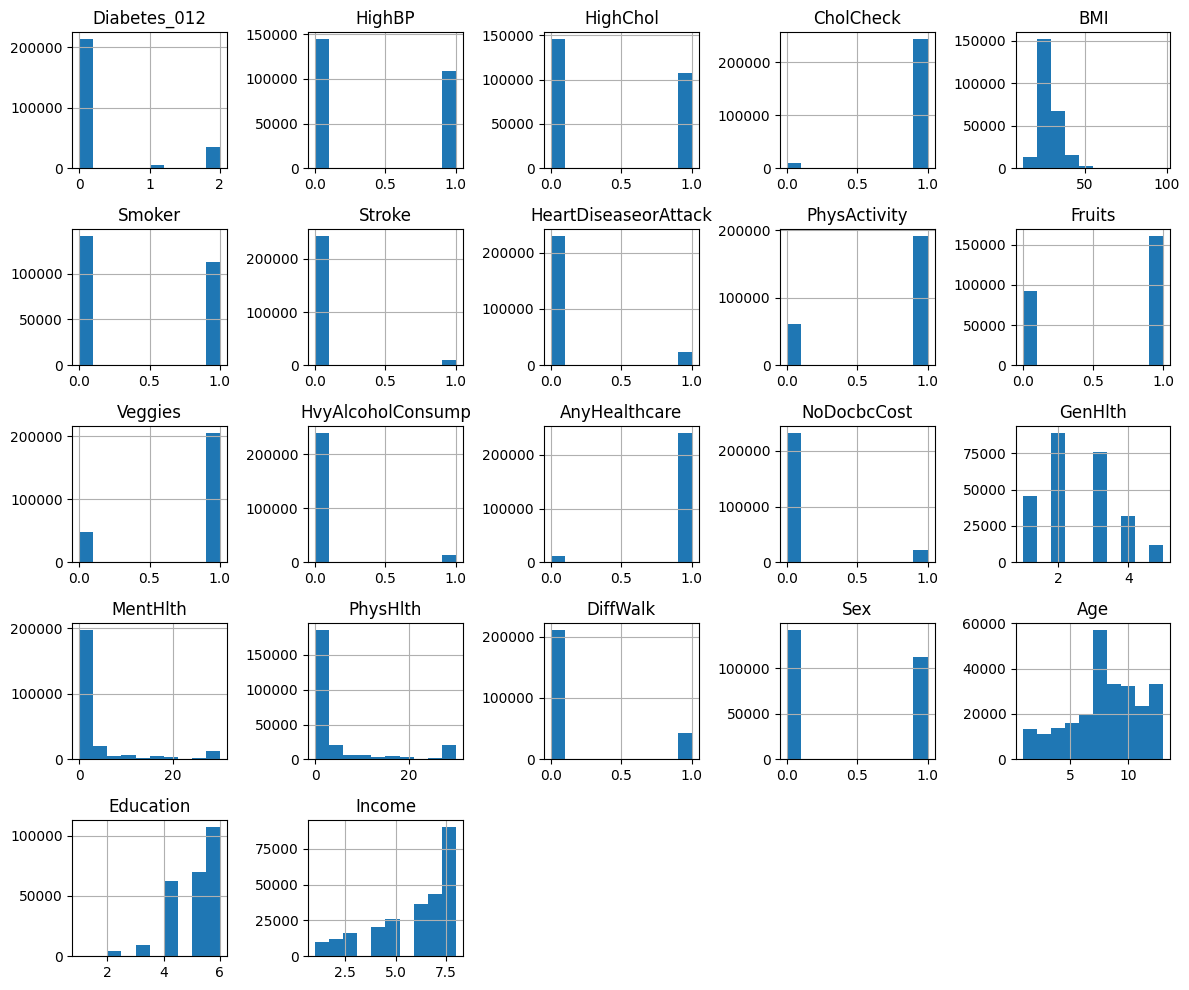

In [14]:
diabetes_012_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# **Separate the dataframe into features and label**


---



In [15]:
# Print the column names of the dataframe diabetes_bin_data
print("Column Names of Diabetes Binary Health Data:")
print(diabetes_bin_data.columns)


Column Names of Diabetes Binary Health Data:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [16]:
# Display summary statistics for numerical columns
print("Diabetes Binary Health Data:")
print(diabetes_bin_data.describe())

print("\nDiabetes Binary 50/50 Split Health Data:")
print(diabetes_5050_data.describe())

print("\nDiabetes 0/1/2 Health Data:")
print(diabetes_012_data.describe())

Diabetes Binary Health Data:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.0

In [17]:
# Separate features and labels for Diabetes Binary Health Data
diabetes_bin_features = diabetes_bin_data.drop('Diabetes_012', axis=1)
diabetes_bin_labels = diabetes_bin_data['Diabetes_012']



In [18]:
# Separate features and labels for Diabetes Binary 50/50 Split Health Data
diabetes_5050_features = diabetes_5050_data.drop('Diabetes_binary', axis=1)
diabetes_5050_labels = diabetes_5050_data['Diabetes_binary']

# Separate features and labels for Diabetes 0/1/2 Health Data
diabetes_012_features = diabetes_012_data.drop('Diabetes_012', axis=1)
diabetes_012_labels = diabetes_012_data['Diabetes_012']



In [19]:
# Print features and labels for each dataset
print("Diabetes Binary Health Data:")
print("Features:\n", diabetes_bin_features)
print("Labels:\n", diabetes_bin_labels)
print(tabulate(pd.DataFrame({'Diabetes_012': diabetes_bin_labels}), headers='keys', tablefmt='psql'))


Streaming output truncated to the last 5000 lines.
| 248681 |              0 |
| 248682 |              0 |
| 248683 |              0 |
| 248684 |              0 |
| 248685 |              0 |
| 248686 |              0 |
| 248687 |              0 |
| 248688 |              0 |
| 248689 |              0 |
| 248690 |              0 |
| 248691 |              0 |
| 248692 |              0 |
| 248693 |              0 |
| 248694 |              0 |
| 248695 |              0 |
| 248696 |              0 |
| 248697 |              0 |
| 248698 |              0 |
| 248699 |              0 |
| 248700 |              0 |
| 248701 |              0 |
| 248702 |              0 |
| 248703 |              0 |
| 248704 |              0 |
| 248705 |              0 |
| 248706 |              0 |
| 248707 |              0 |
| 248708 |              0 |
| 248709 |              0 |
| 248710 |              0 |
| 248711 |              0 |
| 248712 |              0 |
| 248713 |              0 |
| 248714 |              0

In [20]:

print("\nDiabetes Binary 50/50 Split Health Data:")
print("Features:\n", diabetes_5050_features)
print("Labels:\n", diabetes_5050_labels)




Diabetes Binary 50/50 Split Health Data:
Features:
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       0.0        1.0  26.0     0.0     0.0   
1         1.0       1.0        1.0  26.0     1.0     1.0   
2         0.0       0.0        1.0  26.0     0.0     0.0   
3         1.0       1.0        1.0  28.0     1.0     0.0   
4         0.0       0.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
70687     0.0       1.0        1.0  37.0     0.0     0.0   
70688     0.0       1.0        1.0  29.0     1.0     0.0   
70689     1.0       1.0        1.0  25.0     0.0     0.0   
70690     1.0       1.0        1.0  18.0     0.0     0.0   
70691     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     0.0      1.0  ...   
1                       0.0           0.0     1.0      0.0  ...   
2                       0

In [21]:
print("\nDiabetes 0/1/2 Health Data:")
print("Features:\n", diabetes_012_features)
print("Labels:\n", diabetes_012_labels)


Diabetes 0/1/2 Health Data:
Features:
         HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                      

# **Find information gain and state your argument about the data distribution**


---






In [22]:
# Specify the target variable column name for each dataset
target_variable_bin = 'Diabetes_012'
target_variable_5050 = 'Diabetes_binary'
target_variable_012 = 'Diabetes_012'

# Separate features and labels for Diabetes Binary Health Data
diabetes_bin_features = diabetes_bin_data.drop(target_variable_bin, axis=1)
diabetes_bin_labels = diabetes_bin_data[target_variable_bin]

# Calculate information gain for Diabetes Binary Health Data
info_gain_bin = mutual_info_classif(diabetes_bin_features, diabetes_bin_labels)

# Print information gain for each feature in Diabetes Binary Health Data
print("Information Gain for Diabetes Binary Health Data:")
for feature, gain in zip(diabetes_bin_features.columns, info_gain_bin):
    print(f"Feature: {feature}, Information Gain: {gain}")

print()

# Separate features and labels for Diabetes Binary 50/50 Split Health Data
diabetes_5050_features = diabetes_5050_data.drop(target_variable_5050, axis=1)
diabetes_5050_labels = diabetes_5050_data[target_variable_5050]

# Calculate information gain for Diabetes Binary 50/50 Split Health Data
info_gain_5050 = mutual_info_classif(diabetes_5050_features, diabetes_5050_labels)

# Print information gain for each feature in Diabetes Binary 50/50 Split Health Data
print("Information Gain for Diabetes Binary 50/50 Split Health Data:")
for feature, gain in zip(diabetes_5050_features.columns, info_gain_5050):
    print(f"Feature: {feature}, Information Gain: {gain}")

print()

# Separate features and labels for Diabetes 0/1/2 Health Data
diabetes_012_features = diabetes_012_data.drop(target_variable_012, axis=1)
diabetes_012_labels = diabetes_012_data[target_variable_012]

# Calculate information gain for Diabetes 0/1/2 Health Data
info_gain_012 = mutual_info_classif(diabetes_012_features, diabetes_012_labels)

# Print information gain for each feature in Diabetes 0/1/2 Health Data
print("Information Gain for Diabetes 0/1/2 Health Data:")
for feature, gain in zip(diabetes_012_features.columns, info_gain_012):
    print(f"Feature: {feature}, Information Gain: {gain}")

Information Gain for Diabetes Binary Health Data:
Feature: HighBP, Information Gain: 0.05667796509078493
Feature: HighChol, Information Gain: 0.04075258679721494
Feature: CholCheck, Information Gain: 0.04756655668108811
Feature: BMI, Information Gain: 0.03255408280135508
Feature: Smoker, Information Gain: 0.024991693714003782
Feature: Stroke, Information Gain: 0.004264543494072903
Feature: HeartDiseaseorAttack, Information Gain: 0.014676935560732796
Feature: PhysActivity, Information Gain: 0.04866107986307111
Feature: Fruits, Information Gain: 0.040235369016335065
Feature: Veggies, Information Gain: 0.04191971277236317
Feature: HvyAlcoholConsump, Information Gain: 0.0032675614189949798
Feature: AnyHealthcare, Information Gain: 0.0503974633238764
Feature: NoDocbcCost, Information Gain: 0.0015502675138159283
Feature: GenHlth, Information Gain: 0.056536487846167605
Feature: MentHlth, Information Gain: 0.0033000713159441197
Feature: PhysHlth, Information Gain: 0.014480214005732073
Feature:

# **Split Data for Train, Validation, Testing as 70%, 20%, 10% respectively**


---



In [23]:
# Split Diabetes Binary Health Data
bin_train_features, bin_temp_features, bin_train_labels, bin_temp_labels = train_test_split(diabetes_bin_features, diabetes_bin_labels, test_size=0.3, random_state=42)
bin_val_features, bin_test_features, bin_val_labels, bin_test_labels = train_test_split(bin_temp_features, bin_temp_labels, test_size=1/3, random_state=42)

# Split Diabetes Binary 50/50 Split Health Data
split_train_features, split_temp_features, split_train_labels, split_temp_labels = train_test_split(diabetes_5050_features, diabetes_5050_labels, test_size=0.3, random_state=42)
split_val_features, split_test_features, split_val_labels, split_test_labels = train_test_split(split_temp_features, split_temp_labels, test_size=1/3, random_state=42)

# Split Diabetes 0/1/2 Health Data
data_train_features, data_temp_features, data_train_labels, data_temp_labels = train_test_split(diabetes_012_features, diabetes_012_labels, test_size=0.3, random_state=42)
data_val_features, data_test_features, data_val_labels, data_test_labels = train_test_split(data_temp_features, data_temp_labels, test_size=1/3, random_state=42)


In [24]:
# Print the shapes of the resulting sets for each dataset
print("Diabetes Binary Health Data:")
print("Train set shape:", bin_train_features.shape, bin_train_labels.shape)
print("Validation set shape:", bin_val_features.shape, bin_val_labels.shape)
print("Test set shape:", bin_test_features.shape, bin_test_labels.shape)
print()

Diabetes Binary Health Data:
Train set shape: (177576, 21) (177576,)
Validation set shape: (50736, 21) (50736,)
Test set shape: (25368, 21) (25368,)



In [25]:
print("Diabetes Binary 50/50 Split Health Data:")
print("Train set shape:", split_train_features.shape, split_train_labels.shape)
print("Validation set shape:", split_val_features.shape, split_val_labels.shape)
print("Test set shape:", split_test_features.shape, split_test_labels.shape)
print()


Diabetes Binary 50/50 Split Health Data:
Train set shape: (49484, 21) (49484,)
Validation set shape: (14138, 21) (14138,)
Test set shape: (7070, 21) (7070,)



In [26]:
print("Diabetes 0/1/2 Health Data:")
print("Train set shape:", data_train_features.shape, data_train_labels.shape)
print("Validation set shape:", data_val_features.shape, data_val_labels.shape)
print("Test set shape:", data_test_features.shape, data_test_labels.shape)

Diabetes 0/1/2 Health Data:
Train set shape: (177576, 21) (177576,)
Validation set shape: (50736, 21) (50736,)
Test set shape: (25368, 21) (25368,)


# **Build Decision tree model and explain its hyper parameters.**

---



## **For Diabetes Binary Health Data**

---



In [27]:
# Create a decision tree classifier
bin_tree_classifier = DecisionTreeClassifier()

# Train the model
bin_tree_classifier.fit(bin_train_features, bin_train_labels)

# Predict on the validation set
bin_val_predictions = bin_tree_classifier.predict(bin_val_features)

# Evaluate the model
bin_accuracy = accuracy_score(bin_val_labels, bin_val_predictions)
bin_precision = precision_score(bin_val_labels, bin_val_predictions, average='macro')
bin_recall = recall_score(bin_val_labels, bin_val_predictions, average='macro')
bin_f1 = f1_score(bin_val_labels, bin_val_predictions, average='macro')

In [28]:
print("Decision Tree Model Metrics for Diabetes Binary Health Data:")
print("Accuracy:", bin_accuracy)
print("Precision:", bin_precision)
print("Recall:", bin_recall)
print("F1 Score:", bin_f1)

Decision Tree Model Metrics for Diabetes Binary Health Data:
Accuracy: 0.7675417849258909
Precision: 0.40082090734953163
Recall: 0.40688837881283996
F1 Score: 0.4033929235085096


## **For Diabetes Binary 50/50 Split Health Data**

---





In [29]:
# Create a decision tree classifier
split_tree_classifier = DecisionTreeClassifier()

# Train the model
split_tree_classifier.fit(split_train_features, split_train_labels)

# Predict on the validation set
split_val_predictions = split_tree_classifier.predict(split_val_features)

# Evaluate the model
split_accuracy = accuracy_score(split_val_labels, split_val_predictions)
split_precision = precision_score(split_val_labels, split_val_predictions, average='macro')
split_recall = recall_score(split_val_labels, split_val_predictions, average='macro')
split_f1 = f1_score(split_val_labels, split_val_predictions, average='macro')

print("Decision Tree Model Metrics for Diabetes Binary 50/50 Split Health Data:")
print("Accuracy:", split_accuracy)
print("Precision:", split_precision)
print("Recall:", split_recall)
print("F1 Score:", split_f1)

Decision Tree Model Metrics for Diabetes Binary 50/50 Split Health Data:
Accuracy: 0.6574480124487198
Precision: 0.6574391450754102
Recall: 0.6574212269783071
F1 Score: 0.6574229194196344


## **For Diabetes 0/1/2 Health Data**

---



In [30]:
# Create a decision tree classifier
data_tree_classifier = DecisionTreeClassifier()

# Train the model
data_tree_classifier.fit(data_train_features, data_train_labels)

# Predict on the validation set
data_val_predictions = data_tree_classifier.predict(data_val_features)

# Evaluate the model
data_accuracy = accuracy_score(data_val_labels, data_val_predictions)
data_precision = precision_score(data_val_labels, data_val_predictions, average='macro')
data_recall = recall_score(data_val_labels, data_val_predictions, average='macro')
data_f1 = f1_score(data_val_labels, data_val_predictions, average='macro')

print("Decision Tree Model Metrics for Diabetes 0/1/2 Health Data:")
print("Accuracy:", data_accuracy)
print("Precision:", data_precision)
print("Recall:", data_recall)
print("F1 Score:", data_f1)

Decision Tree Model Metrics for Diabetes 0/1/2 Health Data:
Accuracy: 0.7668716493219805
Precision: 0.39937674520064254
Recall: 0.40524860961048303
F1 Score: 0.4018773036921579


criterion: Determines the quality of a split. Options are "gini" for the Gini impurity and "entropy" for information gain.

 max_depth: Controls the maximum depth of the decision tree. It limits the number of splits and helps prevent overfitting.

min_samples_split: Sets the minimum number of samples required to split an internal node. It prevents further splitting if the number of samples is below this threshold.

min_samples_leaf: Sets the minimum number of samples required to be at a leaf node. It ensures each leaf has a minimum number of samples.

max_features: Controls the number of features to consider when looking for the best split. Options include an integer value, a float value, "auto" (all features), "sqrt" (square root of the total features), and "log2" (logarithm base 2 of the total features).

class_weight: Assigns weights to different classes to handle class imbalance. Options include a dictionary specifying the weights or "balanced" to automatically adjust weights based on class frequencies.

# **Train the model using Train set**

---



In [31]:
# Split the data into training and validation sets
bin_train_features, bin_val_features, bin_train_labels, bin_val_labels = train_test_split(diabetes_bin_features, diabetes_bin_labels, test_size=0.2, random_state=42)

# Create a decision tree classifier
bin_tree_classifier = DecisionTreeClassifier()

# Train the model
bin_tree_classifier.fit(bin_train_features, bin_train_labels)

DecisionTreeClassifier()

In [32]:
# Split the data into training and validation sets
split_train_features, split_val_features, split_train_labels, split_val_labels = train_test_split(diabetes_5050_features, diabetes_5050_labels, test_size=0.2, random_state=42)

# Create a decision tree classifier
split_tree_classifier = DecisionTreeClassifier()

# Train the model
split_tree_classifier.fit(split_train_features, split_train_labels)

DecisionTreeClassifier()

In [33]:
# Split the data into training and validation sets
train012_features, val012_features, train012_labels, val012_labels = train_test_split(diabetes_012_features, diabetes_012_labels, test_size=0.2, random_state=42)

# Create a decision tree classifier
tree012_classifier = DecisionTreeClassifier()

# Train the model
tree012_classifier.fit(train012_features, train012_labels)

DecisionTreeClassifier()

# **Predict the labels for validation set**

---



In [34]:
# Predict labels for the validation set
bin_val_predictions = bin_tree_classifier.predict(bin_val_features)

# Predict labels for the validation set
split_val_predictions = split_tree_classifier.predict(split_val_features)

# Predict labels for the validation set
val012_predictions = tree012_classifier.predict(val012_features)


# **State the Evaluation score (Accuracy, Precision, Recall, F1)**

---



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation scores
bin_accuracy = accuracy_score(bin_val_labels, bin_val_predictions)
bin_precision = precision_score(bin_val_labels, bin_val_predictions, average='weighted')
bin_recall = recall_score(bin_val_labels, bin_val_predictions, average='weighted')
bin_f1 = f1_score(bin_val_labels, bin_val_predictions, average='weighted')

# Print the evaluation scores
print("Accuracy (Binary Health Data):", bin_accuracy)
print("Precision (Binary Health Data):", bin_precision)
print("Recall (Binary Health Data):", bin_recall)
print("F1-score (Binary Health Data):", bin_f1)

Accuracy (Binary Health Data): 0.7682710501419111
Precision (Binary Health Data): 0.7810108327670776
Recall (Binary Health Data): 0.7682710501419111
F1-score (Binary Health Data): 0.7744140697608173


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation scores
split_accuracy = accuracy_score(split_val_labels, split_val_predictions)
split_precision = precision_score(split_val_labels, split_val_predictions)
split_recall = recall_score(split_val_labels, split_val_predictions)
split_f1 = f1_score(split_val_labels, split_val_predictions)

# Print the evaluation scores
print("Accuracy (Binary 50/50 Split Health Data):", split_accuracy)
print("Precision (Binary 50/50 Split Health Data):", split_precision)
print("Recall (Binary 50/50 Split Health Data):", split_recall)
print("F1-score (Binary 50/50 Split Health Data):", split_f1)

Accuracy (Binary 50/50 Split Health Data): 0.6489143503783861
Precision (Binary 50/50 Split Health Data): 0.6479352916134525
Recall (Binary 50/50 Split Health Data): 0.6477514541069656
F1-score (Binary 50/50 Split Health Data): 0.6478433598183881


In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Specify the target variable column name for each dataset
target_variable_bin = 'Diabetes_012'

# Separate features and labels for Diabetes Binary Health Data
diabetes_bin_features = diabetes_bin_data.drop(target_variable_bin, axis=1)
diabetes_bin_labels = diabetes_bin_data[target_variable_bin]

# Calculate information gain for Diabetes Binary Health Data
info_gain_bin = mutual_info_classif(diabetes_bin_features, diabetes_bin_labels)

# Print information gain for each feature in Diabetes Binary Health Data
print("Information Gain for Diabetes Binary Health Data:")
for feature, gain in zip(diabetes_bin_features.columns, info_gain_bin):
    print(f"Feature: {feature}, Information Gain: {gain}")

# Create a decision tree classifier
bin_tree_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation
num_folds = 5
scores_accuracy = cross_val_score(bin_tree_classifier, diabetes_bin_features, diabetes_bin_labels, cv=num_folds, scoring='accuracy')
scores_precision = cross_val_score(bin_tree_classifier, diabetes_bin_features, diabetes_bin_labels, cv=num_folds, scoring='precision_macro')
scores_recall = cross_val_score(bin_tree_classifier, diabetes_bin_features, diabetes_bin_labels, cv=num_folds, scoring='recall_macro')
scores_f1 = cross_val_score(bin_tree_classifier, diabetes_bin_features, diabetes_bin_labels, cv=num_folds, scoring='f1_macro')

# Print the evaluation scores for each fold
print("Accuracy scores:", scores_accuracy)
print("Precision scores:", scores_precision)
print("Recall scores:", scores_recall)
print("F1 scores:", scores_f1)

# Calculate and print the mean and standard deviation of the evaluation scores
print("Mean Accuracy:", scores_accuracy.mean())
print("Mean Precision:", scores_precision.mean())
print("Mean Recall:", scores_recall.mean())
print("Mean F1-score:", scores_f1.mean())
print("Standard Deviation of Accuracy:", scores_accuracy.std())
print("Standard Deviation of Precision:", scores_precision.std())
print("Standard Deviation of Recall:", scores_recall.std())
print("Standard Deviation of F1-score:", scores_f1.std())
# Calculate evaluation scores
val012_accuracy = accuracy_score(val012_labels, val012_predictions)
val012_precision = precision_score(val012_labels, val012_predictions, average='weighted')
val012_recall = recall_score(val012_labels, val012_predictions, average='weighted')
val012_f1 = f1_score(val012_labels, val012_predictions, average='weighted')

# Print the evaluation scores
print("Accuracy (0/1/2 Health Data):", val012_accuracy)
print("Precision (0/1/2 Health Data):", val012_precision)
print("Recall (0/1/2 Health Data):", val012_recall)
print("F1-score (0/1/2 Health Data):", val012_f1)

Information Gain for Diabetes Binary Health Data:
Feature: HighBP, Information Gain: 0.05668394802879928
Feature: HighChol, Information Gain: 0.040740658343915825
Feature: CholCheck, Information Gain: 0.04721006896077706
Feature: BMI, Information Gain: 0.031279306515614946
Feature: Smoker, Information Gain: 0.024254292341231
Feature: Stroke, Information Gain: 0.00382468890305776
Feature: HeartDiseaseorAttack, Information Gain: 0.013624778892824096
Feature: PhysActivity, Information Gain: 0.04792488828544972
Feature: Fruits, Information Gain: 0.039598085300514896
Feature: Veggies, Information Gain: 0.04116074365628619
Feature: HvyAlcoholConsump, Information Gain: 0.003207721234570249
Feature: AnyHealthcare, Information Gain: 0.05033174131371454
Feature: NoDocbcCost, Information Gain: 0.00035484999199031364
Feature: GenHlth, Information Gain: 0.056037363038412114
Feature: MentHlth, Information Gain: 0.003671138371117655
Feature: PhysHlth, Information Gain: 0.015979248817139968
Feature: D

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Apply 5-fold cross-validation and calculate accuracy scores for each fold

# Diabetes Binary Health Data
cv_scores_bin = cross_val_score(dt_classifier, diabetes_bin_features, diabetes_bin_labels, cv=5, scoring='accuracy')
print("Diabetes Binary Health Data")
print("Cross Validation Scores:", cv_scores_bin)
print(f"Mean CV Accuracy: {cv_scores_bin.mean():.4f}")

# Diabetes Binary 50/50 Split Health Data
cv_scores_5050 = cross_val_score(dt_classifier, diabetes_5050_features, diabetes_5050_labels, cv=5, scoring='accuracy')
print("\nDiabetes Binary 50/50 Split Health Data")
print("Cross Validation Scores:", cv_scores_5050)
print(f"Mean CV Accuracy: {cv_scores_5050.mean():.4f}")

# Diabetes 0/1/2 Health Data
cv_scores_012 = cross_val_score(dt_classifier, diabetes_012_features, diabetes_012_labels, cv=5, scoring='accuracy')
print("\nDiabetes 0/1/2 Health Data")
print("Cross Validation Scores:", cv_scores_012)
print(f"Mean CV Accuracy: {cv_scores_012.mean():.4f}")

Diabetes Binary Health Data
Cross Validation Scores: [0.76935509 0.76133318 0.77168086 0.76365894 0.76734469]
Mean CV Accuracy: 0.7667

Diabetes Binary 50/50 Split Health Data
Cross Validation Scores: [0.64919726 0.65584553 0.66048946 0.66006507 0.65171877]
Mean CV Accuracy: 0.6555

Diabetes 0/1/2 Health Data
Cross Validation Scores: [0.76933538 0.76135289 0.77142463 0.7647824  0.76693078]
Mean CV Accuracy: 0.7668


# **Hyperparameter tuning using grid search with stratified k-fold cross-validation**

---



In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Read the data
diabetes_bin_data_path = '/content/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_bin_data = pd.read_csv(diabetes_bin_data_path)

# Specify the target variable column name
target_variable_bin = 'Diabetes_012'

# Separate features and labels
diabetes_bin_features = diabetes_bin_data.drop(target_variable_bin, axis=1)
diabetes_bin_labels = diabetes_bin_data[target_variable_bin]

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(diabetes_bin_features, diabetes_bin_labels)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [40]:
# Split the data into training and validation sets
bin_train_features, bin_val_features, bin_train_labels, bin_val_labels = train_test_split(
    diabetes_bin_features, diabetes_bin_labels, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(bin_train_features, bin_train_labels)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Create a new decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'],
                                            max_features=best_params['max_features'])

# Train the model with the best parameters
best_dt_classifier.fit(bin_train_features, bin_train_labels)

# Predict on the validation set
bin_val_predictions = best_dt_classifier.predict(bin_val_features)

# Evaluate the model
bin_accuracy = accuracy_score(bin_val_labels, bin_val_predictions)
bin_precision = precision_score(bin_val_labels, bin_val_predictions, average='macro')
bin_recall = recall_score(bin_val_labels, bin_val_predictions, average='macro')
bin_f1 = f1_score(bin_val_labels, bin_val_predictions, average='macro')

print("Decision Tree Model Metrics for Diabetes Binary Health Data (with Best Parameters):")
print("Accuracy:", bin_accuracy)
print("Precision:", bin_precision)
print("Recall:", bin_recall)
print("F1 Score:", bin_f1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Model Metrics for Diabetes Binary Health Data (with Best Parameters):
Accuracy: 0.8455534531693472
Precision: 0.4573991822909007
Recall: 0.37153085414531994
F1 Score: 0.37594204851927787


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer

diabetes_multi_features = diabetes_012_data.drop('Diabetes_012', axis=1)
diabetes_multi_labels = diabetes_012_data['Diabetes_012']
breast_cancer_data = load_breast_cancer()
breast_cancer_features = breast_cancer_data.data
breast_cancer_labels = breast_cancer_data.target
bin_train_features, bin_val_features, bin_train_labels, bin_val_labels = train_test_split(diabetes_bin_features, diabetes_bin_labels, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and validation sets for each dataset
bin_train_features, bin_val_features, bin_train_labels, bin_val_labels = train_test_split(
    diabetes_bin_features, diabetes_bin_labels, test_size=0.2, random_state=42)

multi_train_features, multi_val_features, multi_train_labels, multi_val_labels = train_test_split(
    diabetes_multi_features, diabetes_multi_labels, test_size=0.2, random_state=42)

cancer_train_features, cancer_val_features, cancer_train_labels, cancer_val_labels = train_test_split(
    breast_cancer_features, breast_cancer_labels, test_size=0.2, random_state=42)

# Perform hyperparameter tuning and evaluation function
def tune_and_evaluate(X_train, X_val, y_train, y_val, dataset_name):
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    dt_classifier = DecisionTreeClassifier()
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print(f"Best Parameters ({dataset_name}):", best_params)

    best_dt_classifier = DecisionTreeClassifier(**best_params)
    best_dt_classifier.fit(X_train, y_train)
    val_predictions = best_dt_classifier.predict(X_val)

    accuracy = accuracy_score(y_val, val_predictions)
    precision = precision_score(y_val, val_predictions, average='macro')
    recall = recall_score(y_val, val_predictions, average='macro')
    f1 = f1_score(y_val, val_predictions, average='macro')

    print(f"Decision Tree Model Metrics for {dataset_name} (with Best Parameters):")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

# Run tuning and evaluation for all datasets
tune_and_evaluate(bin_train_features, bin_val_features, bin_train_labels, bin_val_labels, "Diabetes Binary")
tune_and_evaluate(multi_train_features, multi_val_features, multi_train_labels, multi_val_labels, "Diabetes Multiclass")
tune_and_evaluate(cancer_train_features, cancer_val_features, cancer_train_labels, cancer_val_labels, "Breast Cancer")

cancer_train_features, cancer_val_features, cancer_train_labels, cancer_val_labels = train_test_split(
    breast_cancer_features, breast_cancer_labels, test_size=0.2, random_state=42)

# Perform hyperparameter tuning and evaluation for the diabetes binary dataset
dt_bin_classifier = DecisionTreeClassifier()

param_grid_bin = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_bin = GridSearchCV(dt_bin_classifier, param_grid_bin, cv=5, scoring='accuracy')
grid_search_bin.fit(bin_train_features, bin_train_labels)

best_params_bin = grid_search_bin.best_params_
print("Best Parameters (Diabetes Binary):", best_params_bin)

best_dt_bin_classifier = DecisionTreeClassifier(max_depth=best_params_bin['max_depth'],
                                                min_samples_split=best_params_bin['min_samples_split'],
                                                min_samples_leaf=best_params_bin['min_samples_leaf'],
                                                max_features=best_params_bin['max_features'])

best_dt_bin_classifier.fit(bin_train_features, bin_train_labels)
bin_val_predictions = best_dt_bin_classifier.predict(bin_val_features)

bin_accuracy = accuracy_score(bin_val_labels, bin_val_predictions)
bin_precision = precision_score(bin_val_labels, bin_val_predictions, average='macro')
bin_recall = recall_score(bin_val_labels, bin_val_predictions, average='macro')
bin_f1 = f1_score(bin_val_labels, bin_val_predictions, average='macro')

print("Decision Tree Model Metrics for Diabetes Binary Health Data (with Best Parameters):")
print("Accuracy:", bin_accuracy)
print("Precision:", bin_precision)
print("Recall:", bin_recall)
print("F1 Score:", bin_f1)
print()

# Perform hyperparameter tuning and evaluation for the diabetes multiclass dataset
dt_multi_classifier = DecisionTreeClassifier()

param_grid_multi = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_multi = GridSearchCV(dt_multi_classifier, param_grid_multi, cv=5, scoring='accuracy')
grid_search_multi.fit(multi_train_features, multi_train_labels)

best_params_multi = grid_search_multi.best_params_
print("Best Parameters (Diabetes Multiclass):", best_params_multi)

best_dt_multi_classifier = DecisionTreeClassifier(max_depth=best_params_multi['max_depth'],
                                                  min_samples_split=best_params_multi['min_samples_split'],
                                                  min_samples_leaf=best_params_multi['min_samples_leaf'],
                                                  max_features=best_params_multi['max_features'])

best_dt_multi_classifier.fit(multi_train_features, multi_train_labels)
multi_val_predictions = best_dt_multi_classifier.predict(multi_val_features)

multi_accuracy = accuracy_score(multi_val_labels, multi_val_predictions)
multi_precision = precision_score(multi_val_labels, multi_val_predictions, average='macro')
multi_recall = recall_score(multi_val_labels, multi_val_predictions, average='macro')
multi_f1 = f1_score(multi_val_labels, multi_val_predictions, average='macro')

print("Decision Tree Model Metrics for Diabetes Multiclass Health Data (with Best Parameters):")
print("Accuracy:", multi_accuracy)
print("Precision:", multi_precision)
print("Recall:", multi_recall)
print("F1 Score:", multi_f1)
print()

# Perform hyperparameter tuning and evaluation for the breast cancer dataset
dt_cancer_classifier = DecisionTreeClassifier()

param_grid_cancer = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_cancer = GridSearchCV(dt_cancer_classifier, param_grid_cancer,cv=5, scoring='accuracy')
grid_search_cancer.fit(cancer_train_features, cancer_train_labels)

best_params_cancer = grid_search_cancer.best_params_
print("Best Parameters (Breast Cancer):", best_params_cancer)

best_dt_cancer_classifier = DecisionTreeClassifier(max_depth=best_params_cancer['max_depth'],
                                                   min_samples_split=best_params_cancer['min_samples_split'],
                                                   min_samples_leaf=best_params_cancer['min_samples_leaf'],
                                                   max_features=best_params_cancer['max_features'])

best_dt_cancer_classifier.fit(cancer_train_features, cancer_train_labels)
cancer_val_predictions = best_dt_cancer_classifier.predict(cancer_val_features)

cancer_accuracy = accuracy_score(cancer_val_labels, cancer_val_predictions)
cancer_precision = precision_score(cancer_val_labels, cancer_val_predictions, average='macro')
cancer_recall = recall_score(cancer_val_labels, cancer_val_predictions, average='macro')
cancer_f1 = f1_score(cancer_val_labels, cancer_val_predictions, average='macro')

print("Decision Tree Model Metrics for Breast Cancer Data (with Best Parameters):")
print("Accuracy:", cancer_accuracy)
print("Precision:", cancer_precision)
print("Recall:", cancer_recall)
print("F1 Score:", cancer_f1)

Best Parameters (Diabetes Binary): {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Model Metrics for Diabetes Binary (with Best Parameters):
Accuracy: 0.8439175339009776
Precision: 0.448314681444322
Recall: 0.3576540308316447
F1 Score: 0.3539832610963138



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters (Diabetes Multiclass): {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Model Metrics for Diabetes Multiclass (with Best Parameters):
Accuracy: 0.8455534531693472
Precision: 0.456401598054365
Recall: 0.3667488070332792
F1 Score: 0.36862420472028906

Best Parameters (Breast Cancer): {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Model Metrics for Breast Cancer (with Best Parameters):
Accuracy: 0.9385964912280702
Precision: 0.9309462915601023
Recall: 0.9415329184408778
F1 Score: 0.9354943011882628



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters (Diabetes Binary): {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Model Metrics for Diabetes Binary Health Data (with Best Parameters):
Accuracy: 0.8477806685588143
Precision: 0.4666999497511035
Recall: 0.3759577042150752
F1 Score: 0.3824410514889749



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters (Diabetes Multiclass): {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Model Metrics for Diabetes Multiclass Health Data (with Best Parameters):
Accuracy: 0.8486479028697572
Precision: 0.4693945851432943
Recall: 0.3775357855506971
F1 Score: 0.38466645655870835

Best Parameters (Breast Cancer): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Model Metrics for Breast Cancer Data (with Best Parameters):
Accuracy: 0.9385964912280702
Precision: 0.9365079365079365
Recall: 0.9323616115296429
F1 Score: 0.9343480049362403


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [42]:
# Create a decision tree classifier
bin_tree_classifier = DecisionTreeClassifier()

# Train the model
bin_tree_classifier.fit(diabetes_bin_features, diabetes_bin_labels)

# Predict on the validation set
bin_val_predictions = bin_tree_classifier.predict(diabetes_bin_features)

# Calculate the F1 score using the weighted average
bin_f1_score = f1_score(diabetes_bin_labels, bin_val_predictions, average='weighted')

# Print the evaluation metrics for Diabetes Binary Health Data
print("Evaluation Metrics for Diabetes Binary Health Data:")
print(f"Accuracy: {bin_accuracy}")
print(f"Precision: {bin_precision}")
print(f"Recall: {bin_recall}")
print(f"F1 Score: {bin_f1_score}")
# Evaluate the model
bin_accuracy = accuracy_score(diabetes_bin_labels, bin_val_predictions)
bin_precision = precision_score(diabetes_bin_labels, bin_val_predictions, average='weighted')


print("Evaluation Metrics for Diabetes Binary Health Data:")
print(f"Accuracy: {bin_accuracy}")
print(f"Precision: {bin_precision}")
print(f"Recall: {bin_recall}")
print(f"F1 Score: {bin_f1_score}")

# Perform 5-fold cross-validation on each dataset
cv_scores_bin = cross_val_score(bin_tree_classifier, diabetes_bin_features, diabetes_bin_labels, cv=5)
cv_scores_5050 = cross_val_score(bin_tree_classifier, diabetes_5050_features, diabetes_5050_labels, cv=5)
cv_scores_012 = cross_val_score(bin_tree_classifier, diabetes_012_features, diabetes_012_labels, cv=5)

mean_cv_score_bin = np.mean(cv_scores_bin)
mean_cv_score_5050 = np.mean(cv_scores_5050)
mean_cv_score_012 = np.mean(cv_scores_012)

print("\nMean Cross-Validation Scores:")
print(f"Diabetes Binary Health Data: {mean_cv_score_bin}")
print(f"Diabetes Binary 50/50 Split Health Data: {mean_cv_score_5050}")
print(f"Diabetes 0/1/2 Health Data: {mean_cv_score_012}")

# Split the Diabetes Binary Health Data into training and validation sets
bin_train_features, bin_val_features, bin_train_labels, bin_val_labels = train_test_split(diabetes_bin_features, diabetes_bin_labels, test_size=0.2, random_state=42)

# Specify the parameter grid for grid search cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(bin_tree_classifier, param_grid, cv=5)
grid_search.fit(bin_train_features, bin_train_labels)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:")
print(best_params)
print("Best Score:", best_score)

# Create a new decision tree classifier with the best parameters
best_tree_classifier = DecisionTreeClassifier(**best_params)

# Train the model with the best parameters
best_tree_classifier.fit(bin_train_features, bin_train_labels)

# Predict on the validation set using the best classifier
best_val_predictions = best_tree_classifier.predict(bin_val_features)

# Evaluate the model with the best classifier
best_accuracy = accuracy_score(bin_val_labels, best_val_predictions)
best_precision = precision_score(bin_val_labels, best_val_predictions, average='weighted')
best_recall = recall_score(bin_val_labels, best_val_predictions, average='weighted')
best_f1_score = f1_score(bin_val_labels, best_val_predictions, average='weighted')

print("\nEvaluation Metrics for Diabetes Binary Health Data with Best Classifier:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1_score}")

Evaluation Metrics for Diabetes Binary Health Data:
Accuracy: 0.8477806685588143
Precision: 0.4666999497511035
Recall: 0.3759577042150752
F1 Score: 0.9922558547792609
Evaluation Metrics for Diabetes Binary Health Data:
Accuracy: 0.9923328602964364
Precision: 0.992379742495431
Recall: 0.3759577042150752
F1 Score: 0.9922558547792609

Mean Cross-Validation Scores:
Diabetes Binary Health Data: 0.7666982024597919
Diabetes Binary 50/50 Split Health Data: 0.6549822768387
Diabetes 0/1/2 Health Data: 0.7667455061494797

Best Parameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8470563333207666

Evaluation Metrics for Diabetes Binary Health Data with Best Classifier:
Accuracy: 0.8490026805424157
Precision: 0.8020409823473355
Recall: 0.8490026805424157
F1 Score: 0.8047202758576986


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
